# **Requirements**

In [31]:
!pip install tensorflow-gpu

In [32]:
!nvidia-smi

Tue Jul 20 11:34:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **Convolutional Neural Network**


 

---



Importing the libraries

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Image Resize

In [93]:
IMAGE_SIZE = [224, 224]

Import the dataset

In [94]:
tumor = [('glioma_tumor', 0),('meningioma_tumor', 1),('no_tumor', 2),('pituitary_tumor', 3)]

In [95]:
train_path = '/content/drive/MyDrive/BrainTumor/Train'
test_path = '/content/drive/MyDrive/BrainTumor/Test'

In [96]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/BrainTumor/Train/*')
folders

['/content/drive/MyDrive/BrainTumor/Train/meningioma_tumor',
 '/content/drive/MyDrive/BrainTumor/Train/glioma_tumor',
 '/content/drive/MyDrive/BrainTumor/Train/no_tumor',
 '/content/drive/MyDrive/BrainTumor/Train/pituitary_tumor']

* Types of Brain tumor

1. Glioma - Occurs at the base of the brain.
2. Pituitary - tumors occur in pituitary gland (responsible for growth of the body).
3. Meningioma - tumor grows from meninges, layers of tissue covering the brain and the spinal cord.

Model creation

In [97]:
### Create Model from scratch using CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))

# Step 2 - Pooling
cnn.add(MaxPooling2D(pool_size=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))

# Adding second Pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Adding a third convolutional layer
cnn.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))

# Adding third Pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Adding a fourth convolutional layer
cnn.add(Conv2D(filters=128,kernel_size=2,padding="same",activation="relu"))

# Adding fourth Pooling layer
cnn.add(MaxPooling2D(pool_size=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(500,activation="relu"))

# Step 5 - Output Layer
cnn.add(Dense(len(folders),activation="softmax"))
cnn.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 128)      

Choose the best parameters

In [98]:
cnn.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

Use the Image Data Generator to import the images from the dataset

In [99]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [100]:
# Make sure you provide the same target size as initialied for the image size
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/BrainTumor/Train',
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 2870 images belonging to 4 classes.


In [101]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/BrainTumor/Test',
                                            target_size = (224,224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 394 images belonging to 4 classes.


## Synthetic Minority Oversampling

* Glioma tumor, Meningioma tumor and Pituitary tumor almost same number of datasets ie. 826, 822 and 827 respectively. But the label no_tumor has only 395 samples. 
* Since the number of samples for no_tumor class is less, let's oversample that class using SMOTE from imblearn package.


**fit the model**

In [102]:
# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = train_set, validation_data = test_set, epochs = 20)

Epoch 1/20
180/180 [==============================] - 547s 3s/step - loss: 1.0700 - accuracy: 0.5324 - val_loss: 2.5370 - val_accuracy: 0.3173
Epoch 2/20
180/180 [==============================] - 135s 749ms/step - loss: 0.7652 - accuracy: 0.6787 - val_loss: 1.8353 - val_accuracy: 0.4518
Epoch 3/20
180/180 [==============================] - 135s 751ms/step - loss: 0.6280 - accuracy: 0.7383 - val_loss: 2.3820 - val_accuracy: 0.4822
Epoch 4/20
180/180 [==============================] - 135s 746ms/step - loss: 0.5288 - accuracy: 0.7937 - val_loss: 2.2327 - val_accuracy: 0.5406
Epoch 5/20
180/180 [==============================] - 136s 752ms/step - loss: 0.4575 - accuracy: 0.8129 - val_loss: 2.0892 - val_accuracy: 0.5508
Epoch 6/20
180/180 [==============================] - 134s 743ms/step - loss: 0.4176 - accuracy: 0.8334 - val_loss: 2.4359 - val_accuracy: 0.5533
Epoch 7/20
180/180 [==============================] - 136s 753ms/step - loss: 0.3472 - accuracy: 0.8669 - val_loss: 2.6088 - va

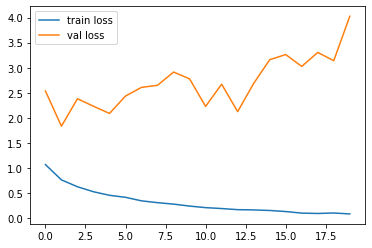

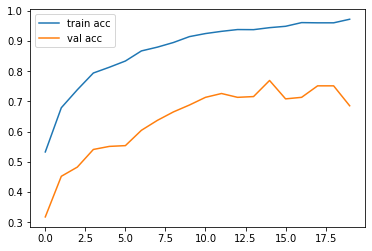

<Figure size 432x288 with 0 Axes>

In [103]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

**Save it as a h5 file**

In [104]:
from tensorflow.keras.models import load_model

cnn.save('model_bt_cnn.h5')

Apply model on test set

In [105]:
y_pred = cnn.predict(test_set)

In [106]:
y_pred

array([[6.2207873e-12, 9.9999881e-01, 1.2414222e-06, 3.5725891e-09],
       [1.1448127e-04, 8.1291491e-01, 1.9351847e-02, 1.6761881e-01],
       [1.7323376e-09, 4.1910025e-06, 9.9999583e-01, 1.5314500e-09],
       ...,
       [5.4348676e-10, 9.9665403e-01, 2.8181410e-05, 3.3177773e-03],
       [4.8636386e-12, 9.9999809e-01, 1.9595393e-06, 2.8810978e-09],
       [2.0037367e-08, 7.5361758e-01, 2.4638234e-01, 1.2140005e-15]],
      dtype=float32)

In [107]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [108]:
y_pred

array([1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 3, 2, 2, 3, 2, 3, 1, 2, 2, 2,
       2, 3, 1, 1, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 1, 2,
       1, 3, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       1, 2, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 0, 1, 3, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 2, 1, 2, 1, 2, 2, 3, 2, 1,
       1, 2, 2, 2, 1, 2, 3, 1, 2, 1, 2, 3, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1,
       2, 3, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 3, 1, 2, 2, 3,
       1, 2, 1, 1, 2, 3, 1, 1, 2, 2, 1, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0,
       1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 3, 0, 1, 3, 2, 2, 3, 2, 0, 2, 3, 1,
       1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 1, 1, 2, 1,
       3, 2, 1, 2, 1, 1, 1, 3, 2, 1, 0, 1, 3, 1, 2, 3, 2, 1, 1, 1, 2, 2,
       2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 0, 2, 0, 3, 1,

In [4]:
model=load_model('model_bt_cnn.h5')

OSError: ignored

In [110]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 128)      

In [1]:
img=image.load_img('/content/drive/MyDrive/btnew/test/meningioma_tumor/image(10).jpg',target_size=(224,224))

NameError: ignored

In [112]:
x=image.img_to_array(img)
x

array([[[5., 5., 5.],
        [5., 5., 5.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [4., 4., 4.]],

       [[6., 6., 6.],
        [5., 5., 5.],
        [4., 4., 4.],
        ...,
        [4., 4., 4.],
        [4., 4., 4.],
        [5., 5., 5.]],

       [[6., 6., 6.],
        [5., 5., 5.],
        [4., 4., 4.],
        ...,
        [5., 5., 5.],
        [5., 5., 5.],
        [5., 5., 5.]],

       ...,

       [[5., 5., 5.],
        [4., 4., 4.],
        [3., 3., 3.],
        ...,
        [4., 4., 4.],
        [5., 5., 5.],
        [3., 3., 3.]],

       [[5., 5., 5.],
        [4., 4., 4.],
        [3., 3., 3.],
        ...,
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]],

       [[5., 5., 5.],
        [4., 4., 4.],
        [3., 3., 3.],
        ...,
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]], dtype=float32)

In [113]:
x.shape

(224, 224, 3)

In [114]:
x=x/255

In [115]:
import numpy as np
x=np.expand_dims(x,axis=0)
result = model.predict(x)

In [116]:
result

array([[6.5665267e-06, 9.8875743e-01, 1.1232295e-02, 3.6387169e-06]],
      dtype=float32)

In [117]:
a=np.argmax(model.predict(x), axis=1)
a

array([1])

In [118]:
if(a==0):
    print("glioma_tumor")
elif(a==1):
    print("meningioma_tumor")
elif(a==2):
    print("no_tumor")
else:
    print("pituitary_tumor")

meningioma_tumor
